In [1]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

# Performinf EDA on Honey Production in the USA Dataset

In [2]:
# Loading Dataset
honeyproduction = pd.read_csv('honeyproduction 1998-2021.csv')
# Print the Type of honeyproduction
print(type(honeyproduction))
# Show top 5 rows
honeyproduction.head()  

<class 'pandas.core.frame.DataFrame'>


,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
honeyproduction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


$Observations:-$ The dataset looks clean and consistent with the description provided in the Data Dictionary.

In [5]:
# Check the shape of the dataset
honeyproduction.shape

(985, 8)

$Observations:-$ We have 985 observations of 8 columns

In [6]:
# Check the datatype of the variables to make sure that the data is read in properly
honeyproduction.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

$Observations:-$
- State is object data type
- Year is integer type currently. Since Year is a categorical variable here, let us convert it to category data data type in Python.
- All the other variables are numerical and there for their python data types (float64 and int64) are ok.

In [8]:
honeyproduction.year = honeyproduction.year.astype('category') # To convert year into categories
honeyproduction.dtypes

State            object
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year           category
dtype: object

In [9]:
# Analyzing the quantitative variables in the dataset
honeyproduction.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07


$Observations:-$
- Number of colonies in every state are spread over a huge range. Ranging from 2000 to 530000.
- The mean numcol is close to the 75% percentile of the data, indicating a right skew.
- As expected, standard deviation of numcol is very high
- yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.

Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.

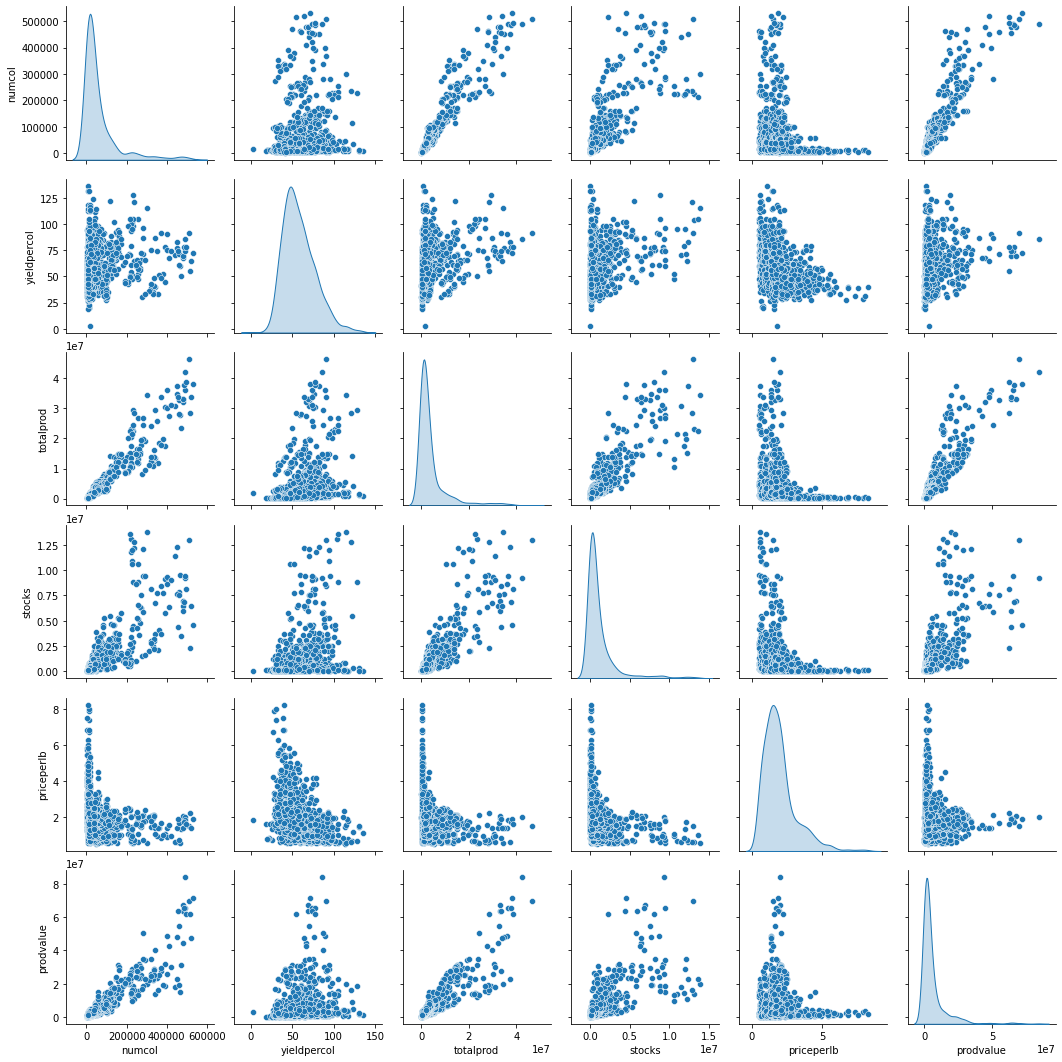

In [10]:
# Looking at the relationship between numerical variables using pair plots
sns.pairplot(honeyproduction, diag_kind="kde")

In [11]:
correlation = honeyproduction.corr() # creating a Correlation table
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000


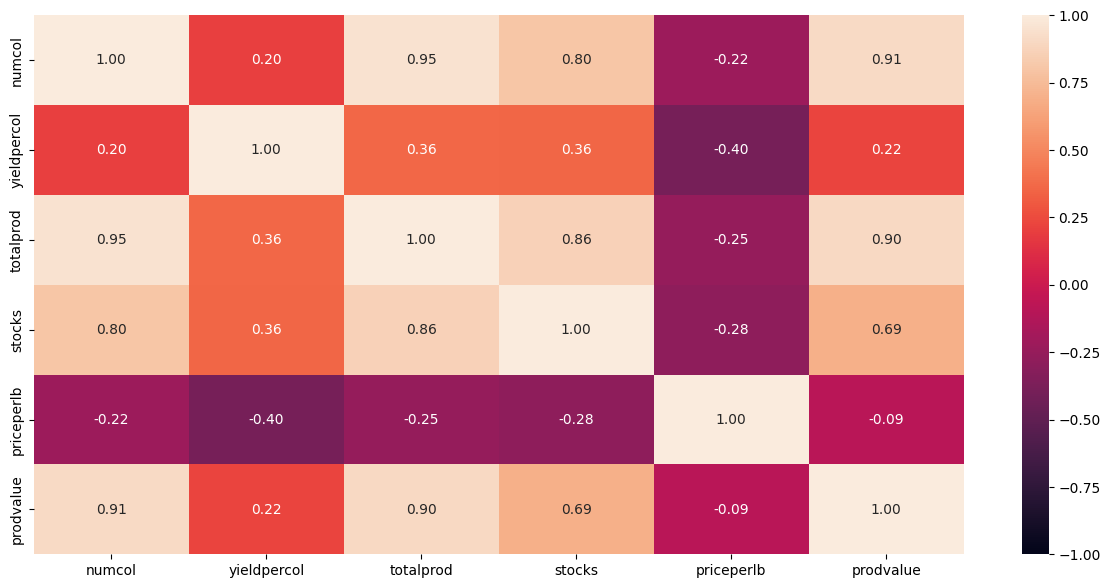

In [13]:
# Looking at the relationship between numerical variables using correlation plots
plt.figure(figsize=(15, 7)) 
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

$Observations:-$

- Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
- Yield per colony does not have a high correlation with any of the features that we have in our dataset.
- Same is the case with priceperlb.
- Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.

In [15]:
# Exploring  the categorical features - state and year
print(honeyproduction.State.nunique())
print(honeyproduction.year.nunique())

44
24


$Observations:-$ We have honey production data for 44 US states over a span of 24 years, from 1998 to 2021.

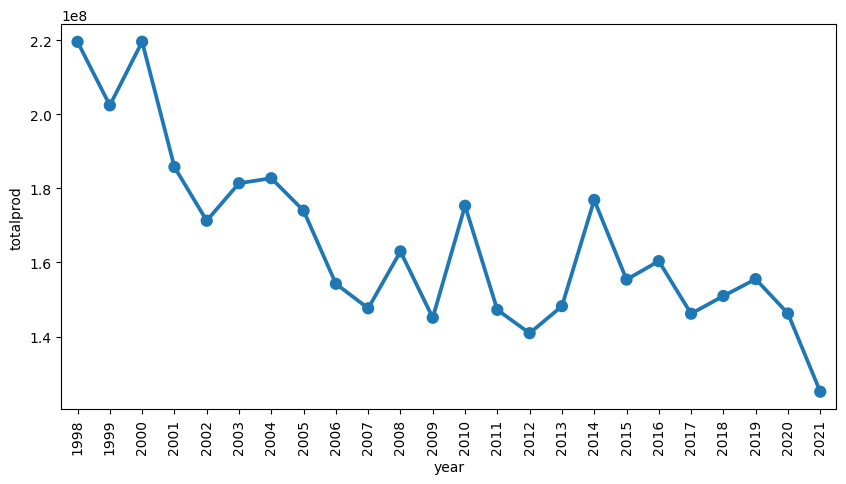

In [23]:
# Looking at the overall trend of honey production in the US over the years
plt.figure(figsize=(10, 5))
sns.pointplot(x='year', y='totalprod', data=honeyproduction, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

$Point Plot :-$
A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

For more information on Point plot refer Official Seaborn Documentation for [Point Plot.](https://seaborn.pydata.org/generated/seaborn.pointplot.html)

$Observations:-$
- The overall honey production in the US has been decresing over the years.
- ***Total honey production = number of colonies * average yield per colony.*** 
- Let us check if the honey production is decreasing due to one of these factors or both.

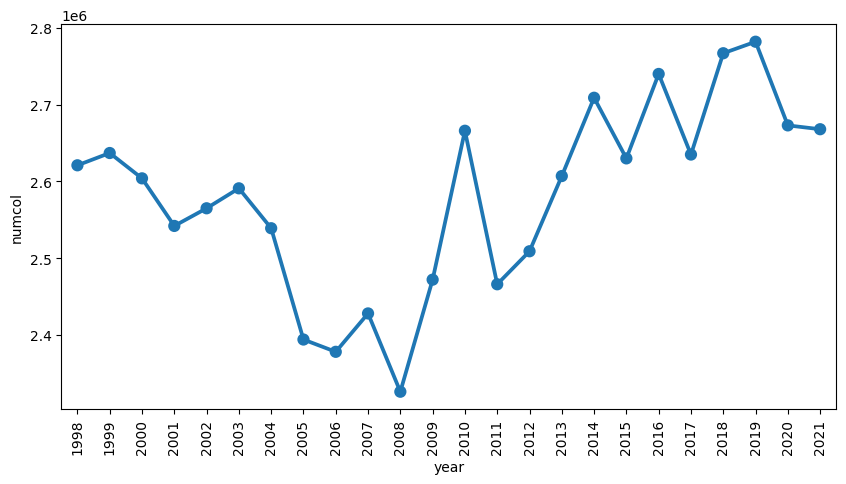

In [25]:
# Variation in the number of colonies over the years
plt.figure(figsize=(10,5))
sns.pointplot(x='year', y='numcol', data=honeyproduction, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

$Observations:-$
- The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
- It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

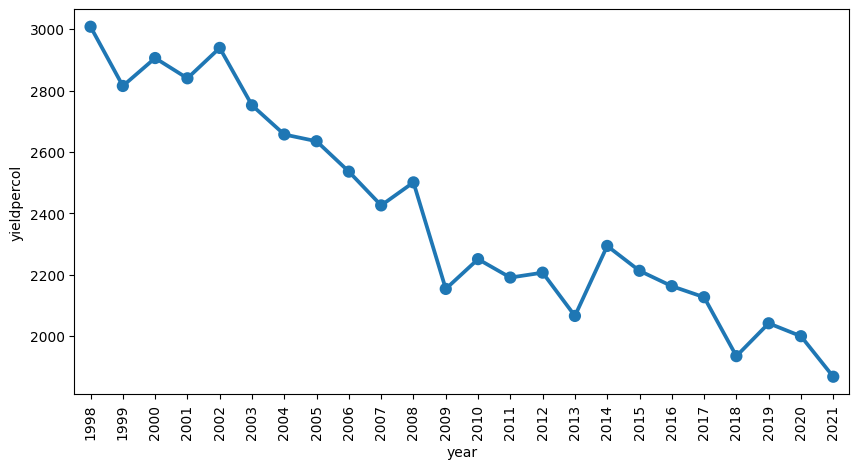

In [27]:
# Variation of yield per colony over the years
plt.figure(figsize=(10,5))
sns.pointplot(x='year', y='yieldpercol', data=honeyproduction, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

$Observation:-$
- In contrast to number of colonies, the yield per colony has been decreasing since 1998.
- This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

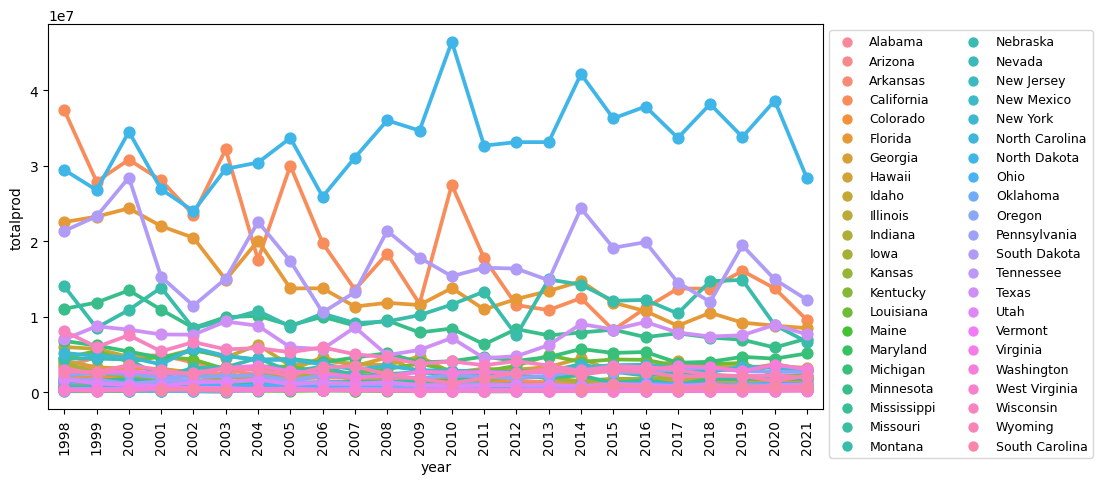

In [33]:
# Looking at the production trend at state level
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(10, 5)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyproduction, estimator=sum, ci=None, hue = 'State')
plt.legend(ncol=2, fontsize=9,markerscale=0.8, bbox_to_anchor=(1,1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

$Observations:-$ There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding.

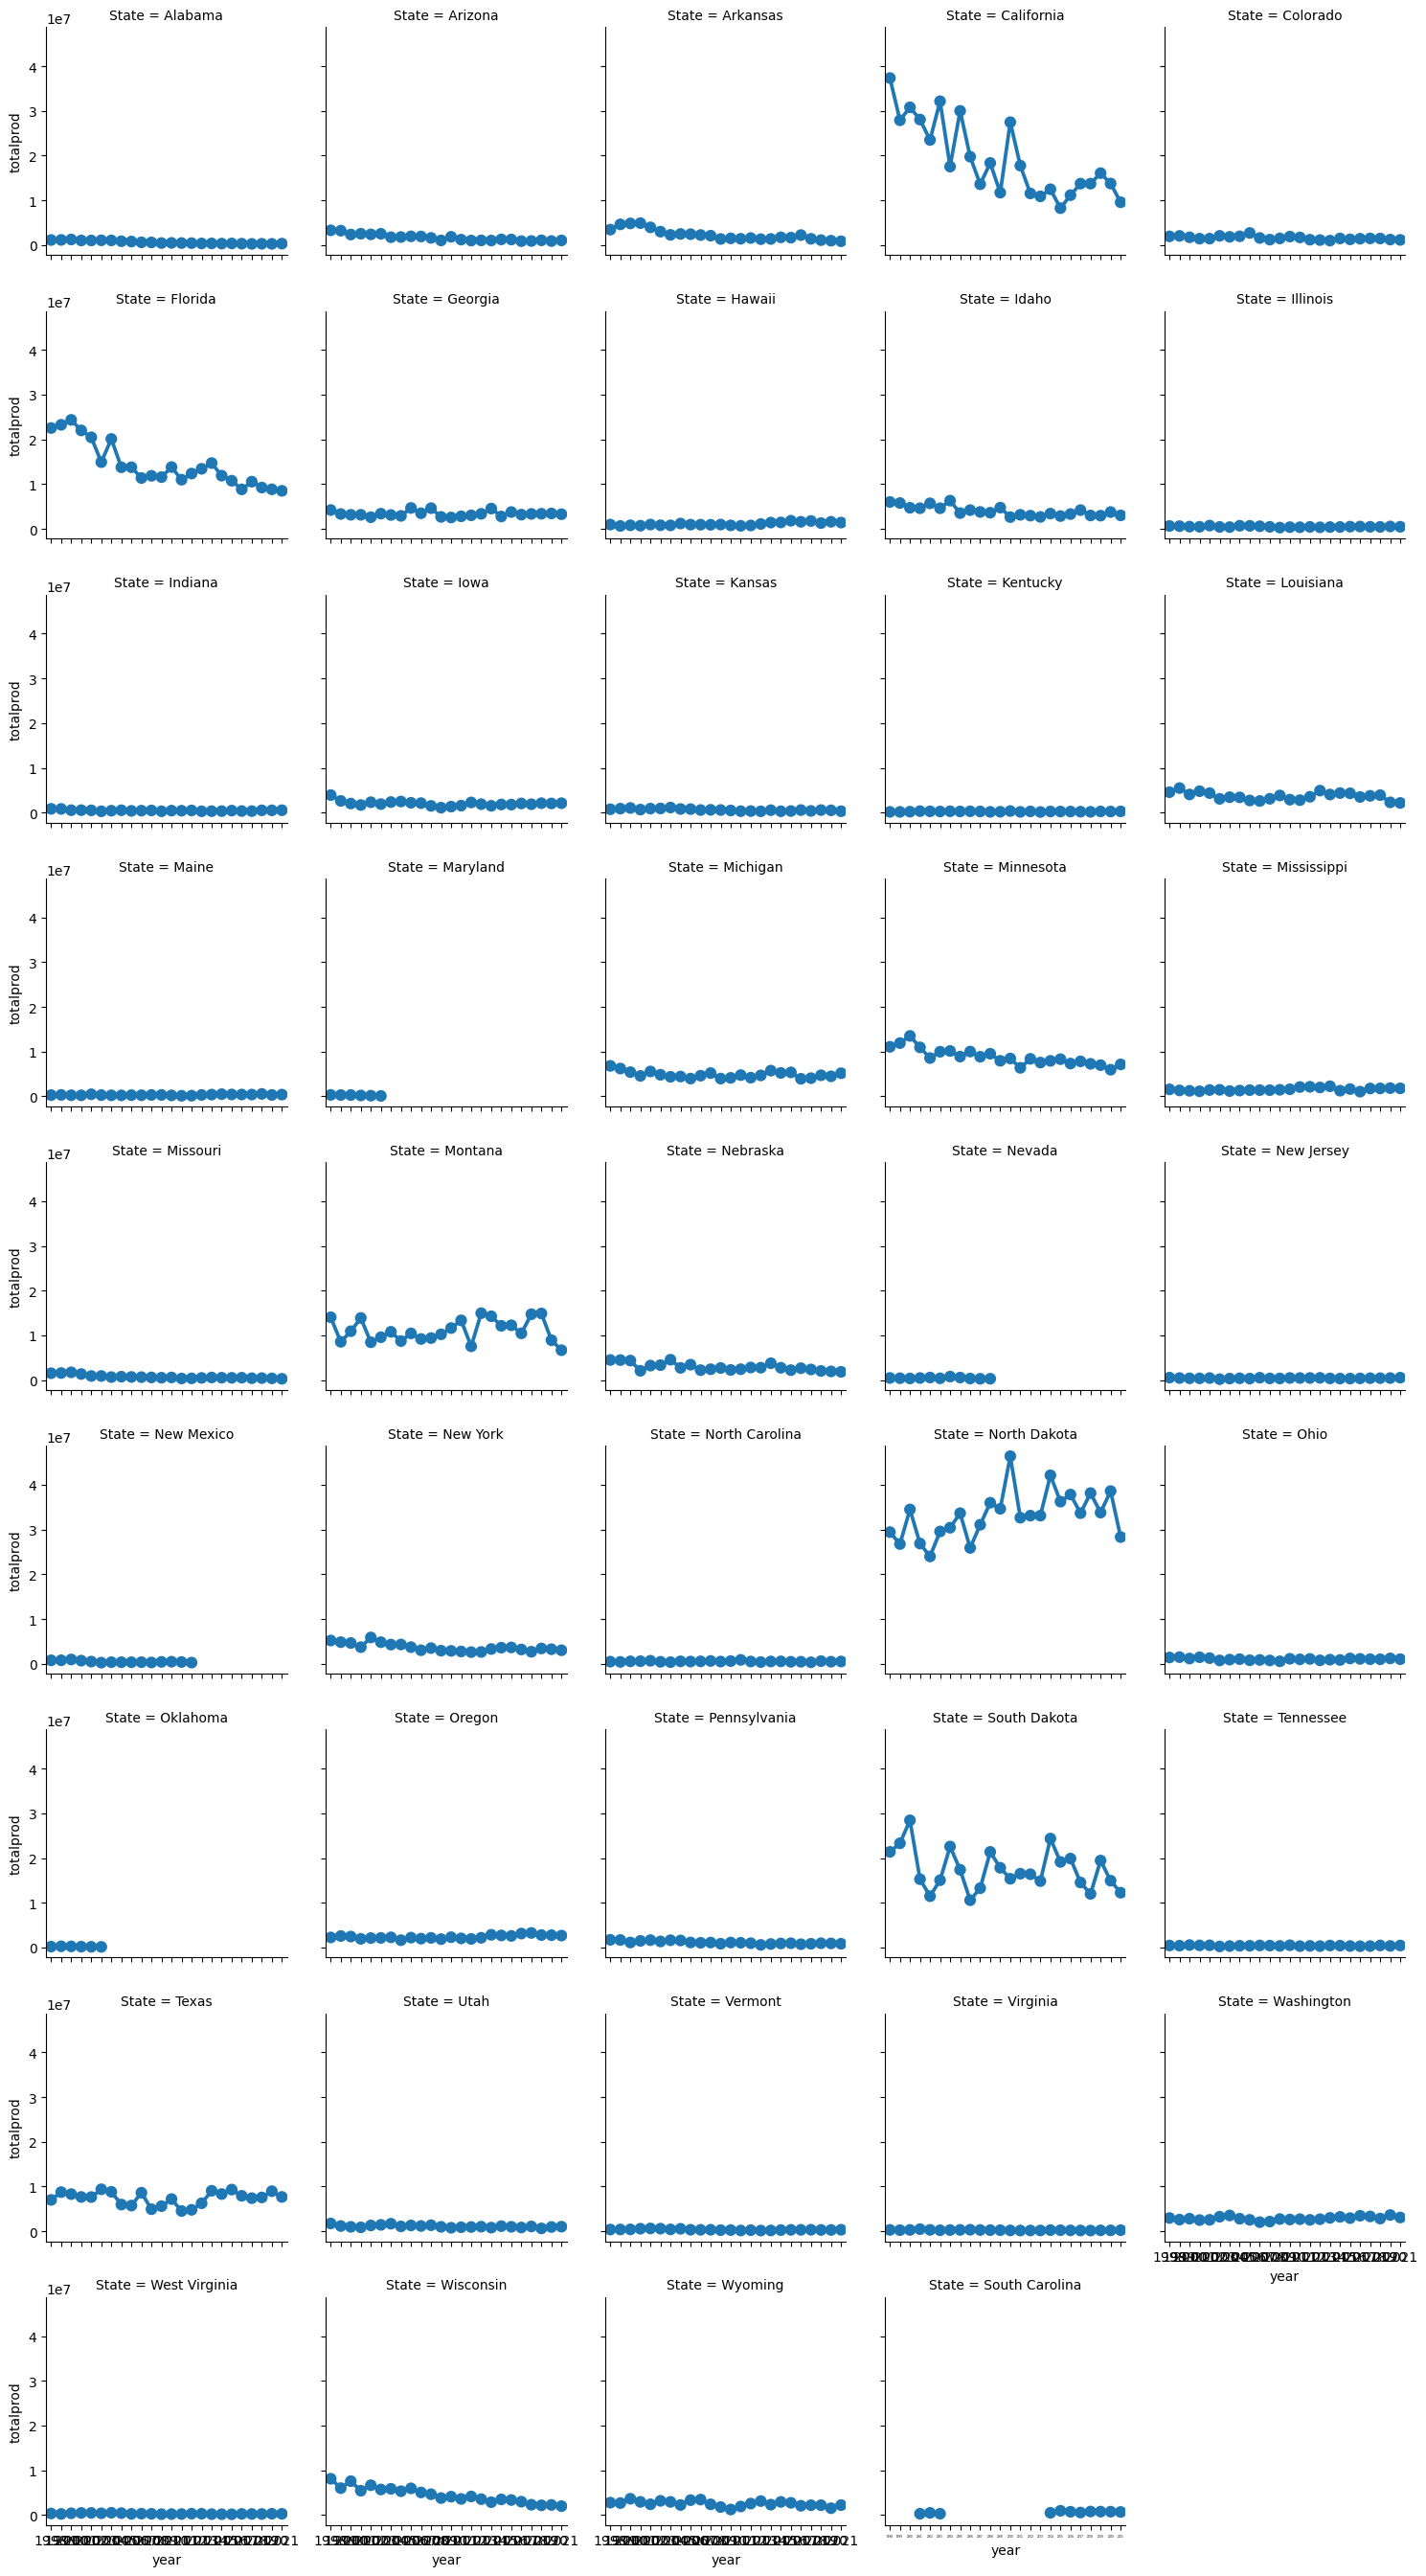

In [38]:
sns.catplot(x='year', y='totalprod', data=honeyproduction,
                estimator=sum, col='State', kind="point",
                height=3,col_wrap = 5)
plt.show()

$Observations:-$
- The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
- Unfortunately, the honey production in California has seen a steep decline over the years.
- Florida's total production also has been on a decline.
- South Dakota has more of less maintained its levels of production.
- North Dakota has actually seen an impressive increase in the honey production.

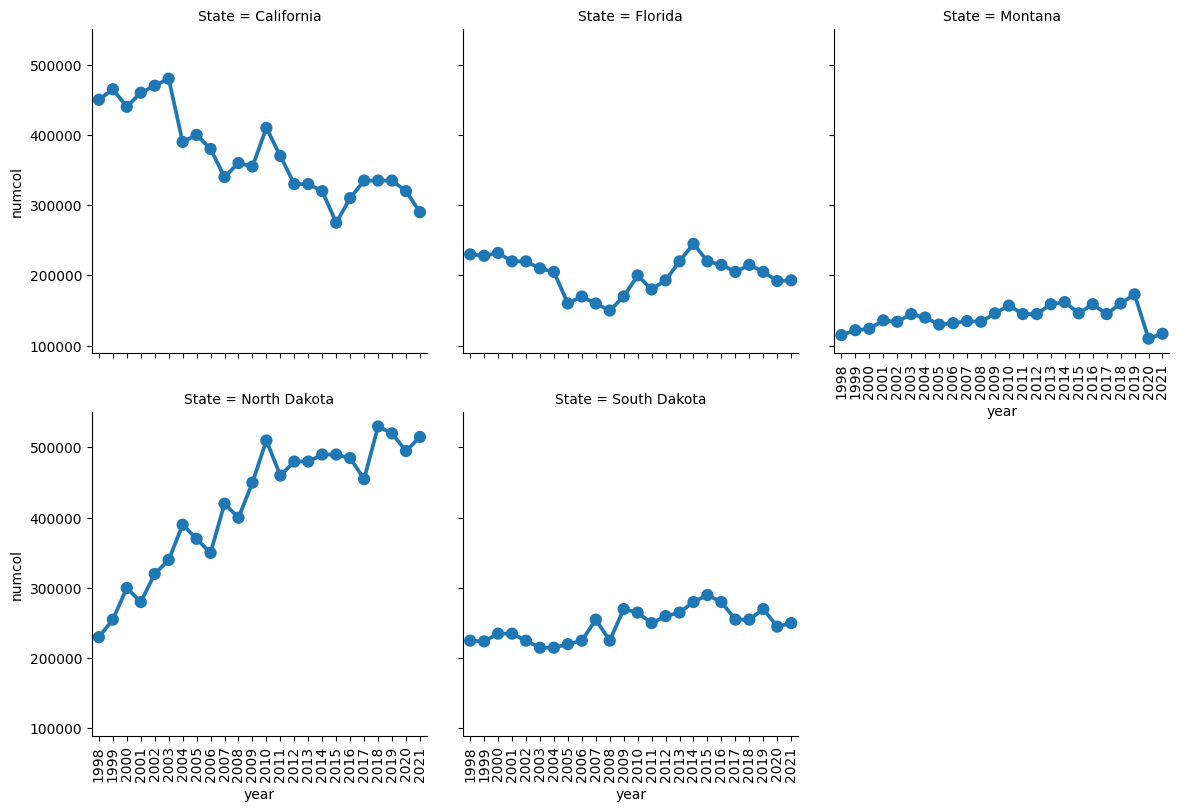

In [42]:
# Looking at the yearly trend in number of colonies and yield per colony in these 5 states
# California, Florida, North Dakota and South Dakota and Montana
cplot_1=sns.catplot(x='year', y='numcol', 
            data=honeyproduction[honeyproduction["State"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='State', kind="point",
                height=4,col_wrap = 3)
cplot_1.set_xticklabels(rotation=90)
plt.show()


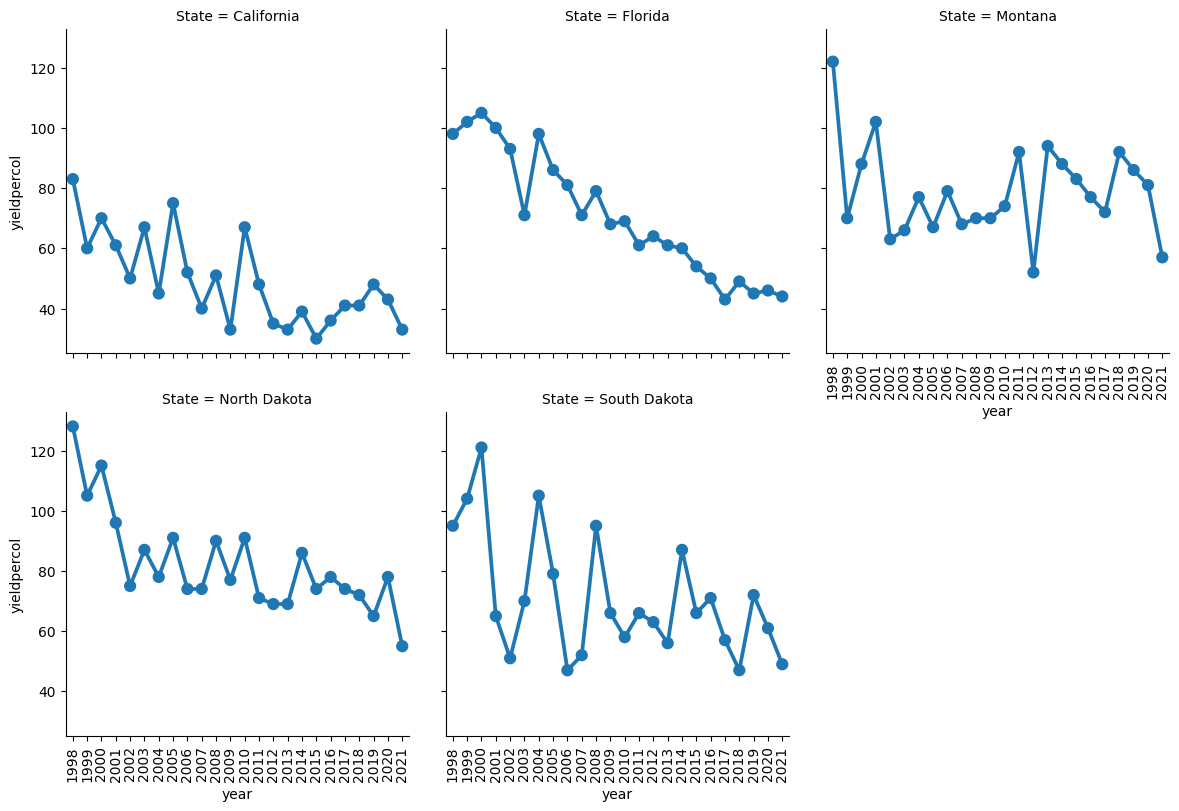

In [43]:
cplot_2=sns.catplot(x='year', y='yieldpercol', 
            data=honeyproduction[honeyproduction["State"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='State', kind="point",
                height=4,col_wrap = 3)
cplot_2.set_xticklabels(rotation=90)
plt.show()

$Observation:-$
- In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
- If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

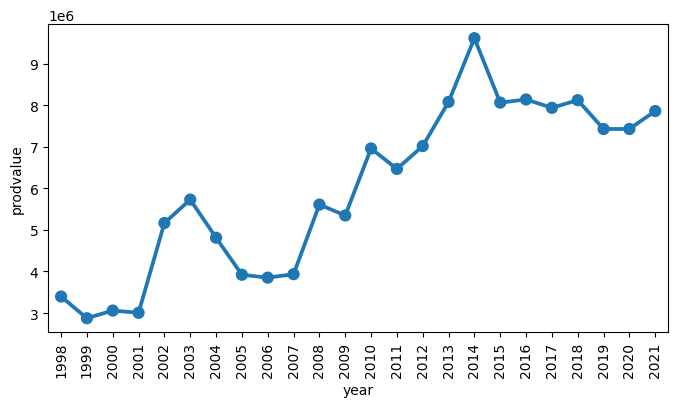

In [46]:
# Seeing the effect, the declining production trend has had on the value of production
plt.figure(figsize=(8, 4)) # To resize the plot
sns.pointplot(x="year", y="prodvalue", data=honeyproduction, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

$Observations:-$
- This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
- As the supply declined, the demand has added to the value of honey.

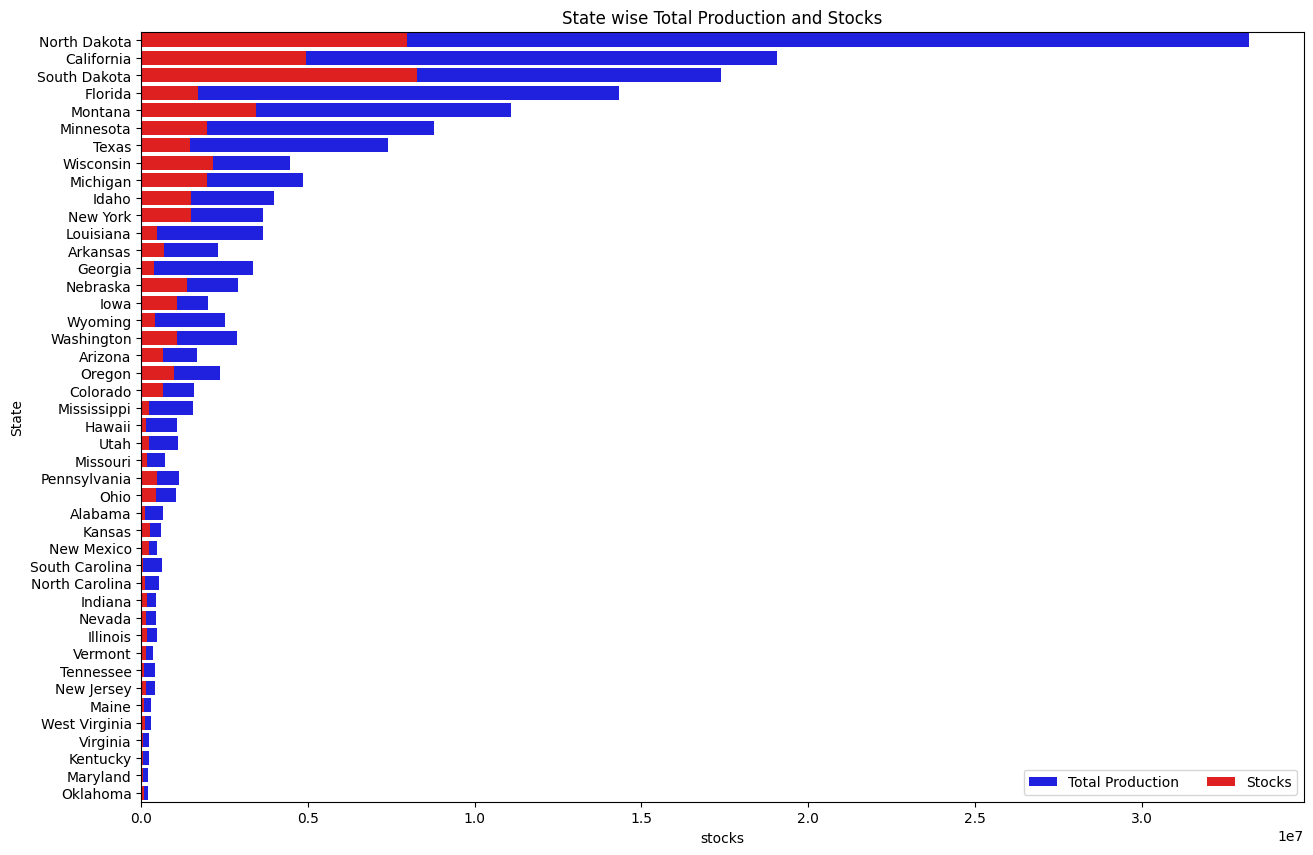

In [49]:
# check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers
plt.figure(figsize = (15,10)) # To resize the plot
# Plot total production per state
sns.barplot(x="totalprod", y="State", data=honeyproduction.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per State
sns.barplot(x="stocks", y="State", data=honeyproduction.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)
plt.title("State wise Total Production and Stocks")
# Add a legend  
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

$Observations:-$
- North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
- Florida has the highest efficiency among the major honey producing states
- Michigan is more efficient than Wisconsin in selling honey.

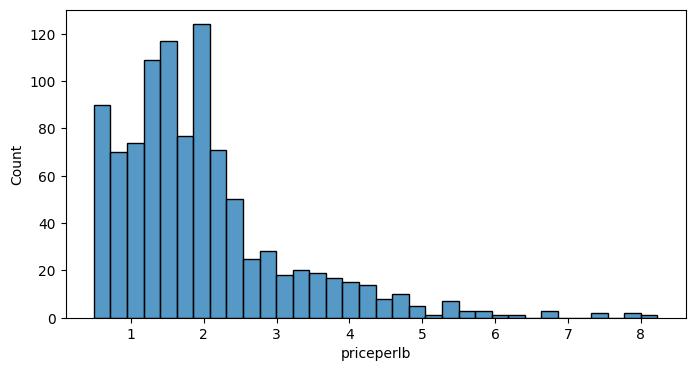

In [52]:
# Looking at the spread of average price of a pound of honey
plt.figure(figsize=(8,4)) # To resize the plot
sns.histplot(honeyproduction.priceperlb)
plt.show()

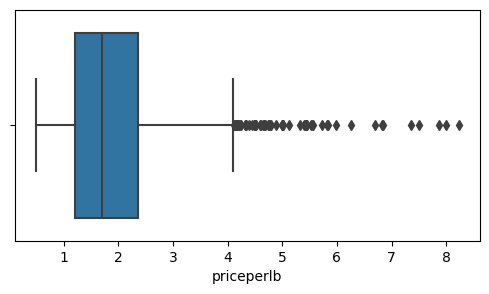

In [57]:
plt.figure(figsize=(6, 3)) # To resize the plot
# Plotting a Box plot for 'priceperlb'
sns.boxplot(data = honeyproduction, x = 'priceperlb')
plt.show()

$Observations:-$
- Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
- The median price per pound of honey is 1.5

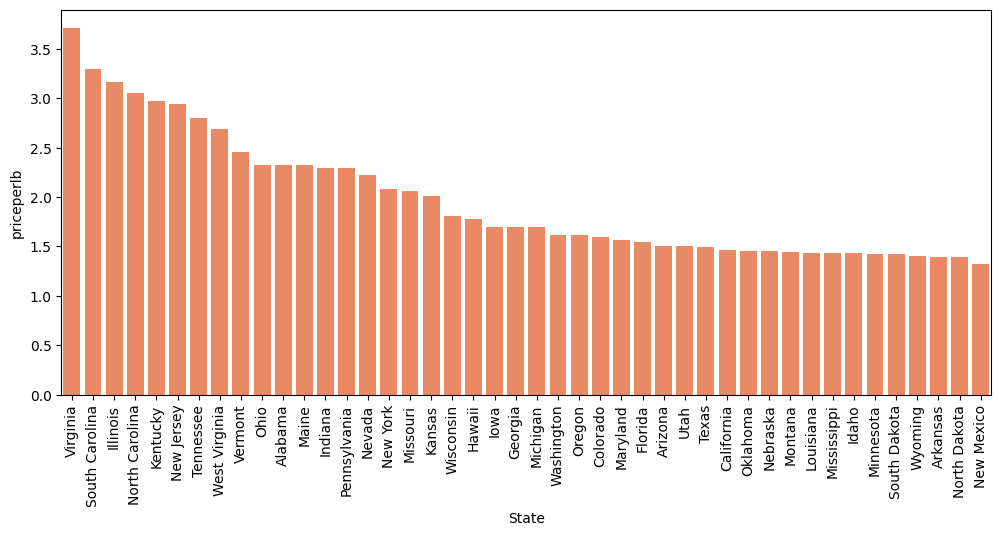

In [63]:
# Looking at the average price per pound of honey across states
plt.figure(figsize=(12, 5)) # To resize the plot
sns.barplot(data = honeyproduction, x = "State", y = "priceperlb", ci=None, color = "coral",
            order=honeyproduction.groupby('State').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

$Observations:-$
- Virginia has the highest price per pound of honey.
- The average price per pound of honey in the major honey producing states is towards the lower end.

# Conclusion

- We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased.
- The reason for the declined honey production is the decrease in the yield per colony over the years.
- The major honey producing states are California, Florida, North Dakota, South Dakota and Montana.
- Among these, Florida has been very efficient in selling honey.